<a href="https://colab.research.google.com/github/Slrosales/Programacion_con_Python/blob/main/M%C3%B3dulo%203/3_Analisis_de_Graficas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[csv source Pokenon with stats](https://www.kaggle.com/datasets/abcsds/pokemon)

# Importación e instalación de librerías

In [1]:
# Importamos la libreria como pd
import pandas as pd

# Importamos la libreria como sns
import seaborn as sns

# Importamos la libreria como plt
import matplotlib.pyplot as plt

# Importamos la libreria como np
import numpy as np

# Subir un arhcivo csv

## Importación mediante link

In [39]:
# Leer desde un archivo CSV
df = pd.read_csv('https://raw.githubusercontent.com/Slrosales/INT_A_LA_ING_DE_SISTEMAS/main/Archivos%20csv/Pokemon.csv')
df.head() # muestrame las primeras 5 filas

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## Cargar el archivo en drive

In [3]:
# De la librería google.colab, importamos files
from google.colab import files

`iter(uploaded)`: La función iter se utiliza para crear un iterador a partir del diccionario uploaded que contiene los archivos subidos. Esto permite recorrer los elementos del diccionario uno por uno.

`next(iter(uploaded))`: La función next se usa para obtener el primer elemento del iterador creado en el paso anterior. Este primer elemento es un par clave-valor donde la clave es el nombre del archivo y el valor son los datos

In [4]:
# Subir el archivo en formato .csv
print("Suba el archivo en formato .csv")
uploaded = files.upload()

# Verificar si se cargó algún archivo
if not uploaded:
    # Se puede realizar una acción alternativa aquí si es necesario
    print("No se cargó ningún archivo")
else:
    # Leer el archivo CSV
    df = pd.read_csv(next(iter(uploaded)))
    print("Archivo cargado correctamente.")

Suba el archivo en formato .csv


Saving Pokemon.csv to Pokemon.csv
Archivo cargado correctamente.


## Leer desde Google Drive

In [5]:
# De la librería google.colab, importamos drive
from google.colab import drive

In [6]:
df = pd.read_csv("Pokemon.csv")
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


# Observación y descripción de datos

## Identificación de la cantidad de filas y columnas del df

In [40]:
df.shape

(800, 13)

Tengo 800 filas y 13 columnas

## Identificación de la estructura e integridad de los datos

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


**#:** Identificación de cada Pokémon

**Name:** Nombre de cada Pokémon

**Type 1:** Cada Pokémon tiene un tipo, esto determina debilidades/resistencias a los ataques

**Type 2:** Algunos Pokémon son de tipo dual y tienen 2 tipos

**Total:** Suma de todas las estadísticas que vienen después de esto, una guía general de cuán fuerte es un Pokémon

**HP:** Puntos de golpe, o salud, define cuánto daño puede soportar un Pokémon antes de desmayarse

**Attack:** El modificador base para ataques normales (por ejemplo, Arañazo, Puñetazo)

**Defense:** La resistencia al daño base contra ataques normales

**Sp. Atk:** El modificador base para ataques especiales (por ejemplo, Lanzallamas, Rayo Burbuja)

**Sp. Def:** La resistencia al daño base contra ataques especiales

**Speed:** Determina qué Pokémon ataca primero en cada turno


### Selecciono las columnas con las que voy a trabajar

In [42]:
df_pokemon = df[['Name', 'Type 1', 'Type 2', 'Total', 'Attack', 'Defense', 'Speed', 'Generation']]
df_pokemon.head()

,Name,Type 1,Type 2,Total,Attack,Defense,Speed,Generation
0,Bulbasaur,Grass,Poison,318,49,49,45,1
1,Ivysaur,Grass,Poison,405,62,63,60,1
2,Venusaur,Grass,Poison,525,82,83,80,1
3,VenusaurMega Venusaur,Grass,Poison,625,100,123,80,1
4,Charmander,Fire,NaN,309,52,43,65,1


In [43]:
# Identifico la estructura y la integridad de tus datos
df_pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   Total       800 non-null    int64 
 4   Attack      800 non-null    int64 
 5   Defense     800 non-null    int64 
 6   Speed       800 non-null    int64 
 7   Generation  800 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 50.1+ KB


## Resumen estadístico de las variables continuas

In [44]:
df_pokemon.describe()

,Total,Attack,Defense,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,79.001250,73.842500,68.277500,3.32375
std,119.96304,32.457366,31.183501,29.060474,1.66129
min,180.00000,5.000000,5.000000,5.000000,1.00000
25%,330.00000,55.000000,50.000000,45.000000,2.00000
50%,450.00000,75.000000,70.000000,65.000000,3.00000
75%,515.00000,100.000000,90.000000,90.000000,5.00000
max,780.00000,190.000000,230.000000,180.000000,6.00000



**NOTA:** Ignoro la columna 'Generation', porque a pesar de que sus datos estan como int, se sobre entiende que son datos cualitativos

*   **mean:** el promedio de poder de **ataque** de los Pokémon es de **79**, para **defensa** es de **73.84** y para la **velocidad** es de **68.27**
*   **min:** El mínimo poder de ataque, defensa y velocidad registrado es de 5
*   **max:** El máximo poder de ataque registrado es de 190, para defensa es 230 y velocidad es de 180


Se puede suponer que el Pokémon con el ataque más fuerte no será capaz de derrotar al Pokémon más fuerte





## Comparación entre la mediana y la media


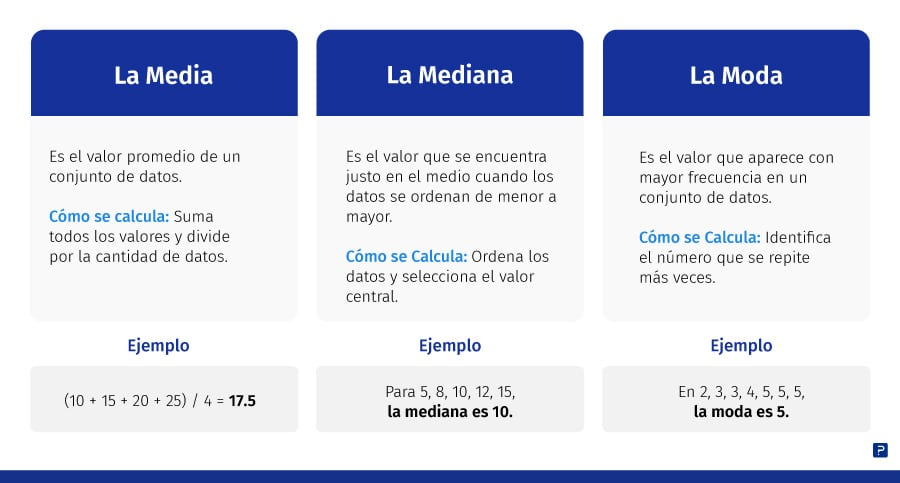

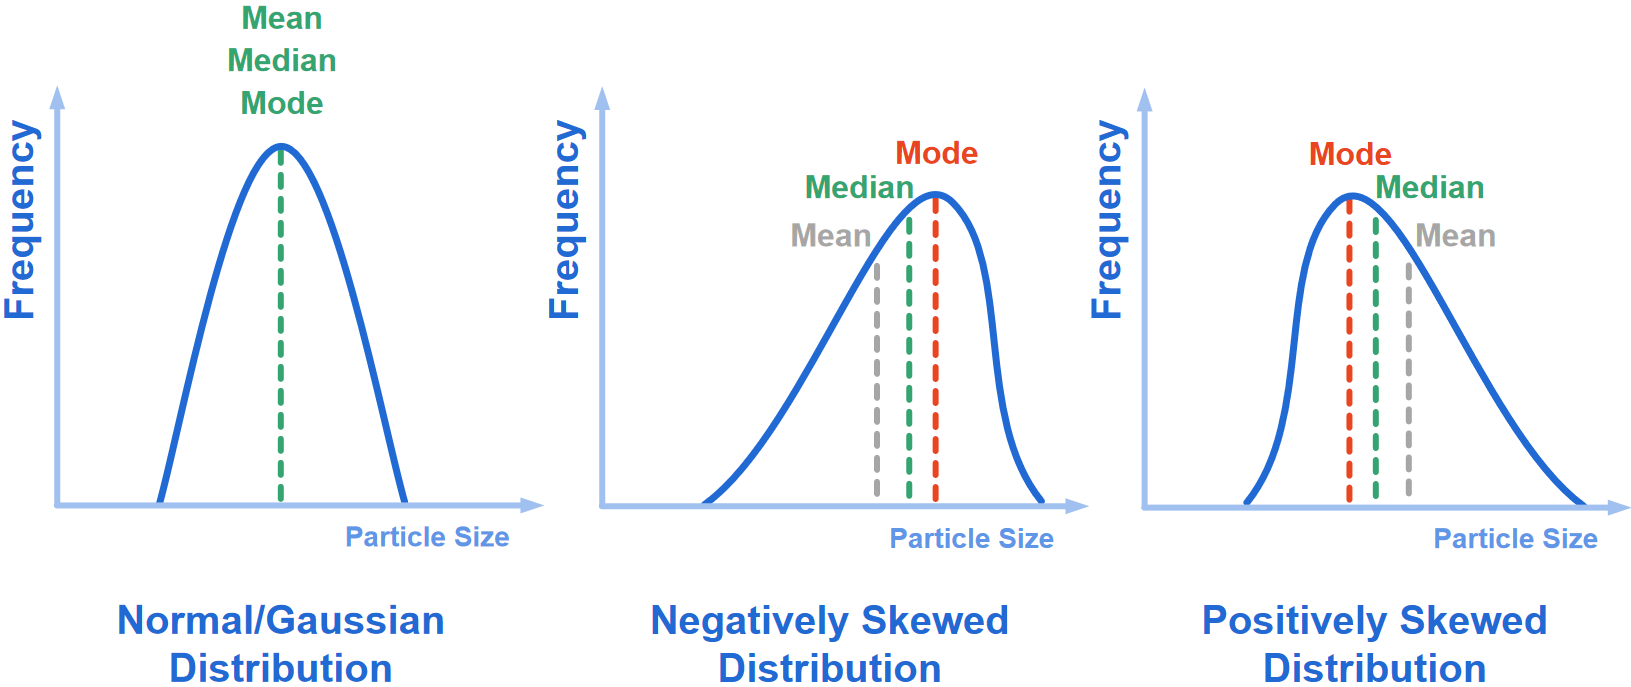

* Si la media es mucho mayor que la mediana, podría indicar que hay valores atípicos (outliers) que están inflando la media.

In [45]:
mediana = df_pokemon['Attack'].median()
media = df_pokemon['Attack'].mean()

print(f"Media: {media}")
print(f"Mediana: {mediana}")

Media: 79.00125
Mediana: 75.0


In [46]:
mediana = df_pokemon['Defense'].median()
media = df_pokemon['Defense'].mean()

print(f"Media: {media}")
print(f"Mediana: {mediana}")

Media: 73.8425
Mediana: 70.0


Se puede asumir que no hay valores atípicos que afecten fuertemente la media

## Resumen estadístico de las columnas que contienen datos de tipo objeto

(columnas que almacenan texto o categorías)

In [47]:
df_pokemon.describe(include=object)

,Name,Type 1,Type 2
count,800,800,414
unique,800,18,18
top,Bulbasaur,Water,Flying
freq,1,112,97


*   **unique:** hay 800 nombres diferentes de Pokémon registrados, solo se hay 18 diferentes tipo 1 y tipo 2
*   **top y freq:** Hay 112 tipo agua registrados para tipo 1 y para tipo 2 hay 97 de vuelo. Estos siendo las características de pokémones que más se repiten.





# Barras

**Objetivo:** Identificar la variable categórica con mayor frecuencia y a partir de esto, determinar tendencias con respecto a las demás o entre ellas mismas

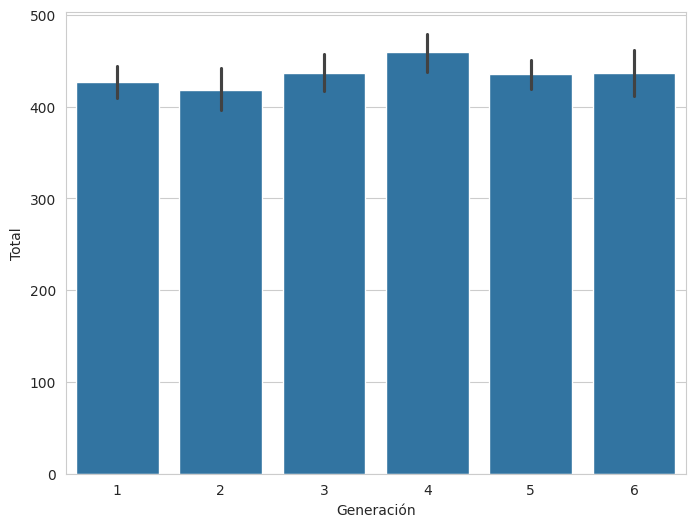

In [48]:
plt.figure(figsize=(8,6))
sns.barplot(data = df, x = "Generation", y = "Total");
plt.ylabel('Total');
plt.xlabel('Generación');

**Total:** suma de todas las estadísticas que vienen después de type 2, una guía general de lo fuerte que es un Pokémon.

La barra de la generación 4 es la más alta, por lo tanto, es la generación más fuerte, cabe destacar que las demás generaciones no están tan por debajo de esta

# Histogramas

**Objetivo**: Se utiliza para visualizar la distribución de una variable numérica. Muestra la frecuencia de valores en intervalos discretos (bins) en forma de barras verticales. El objetivo es comprender la forma de la distribución, identificar modas, picos, simetría, sesgo y dispersión de los datos.

## ¿Con bins o sin bins?

La elección de utilizar bins o no en un histograma depende de varios factores, incluyendo la naturaleza de tus datos y el propósito de la visualización.

**Histograma sin bins (distribución general):**

* Ventajas: Un histograma de densidad suaviza la representación de la
distribución de los datos, lo que puede ser útil para identificar tendencias generales.

* **Cuándo usarlo:** Cuando se tiene datos **continuos** o cuando se desea visualizar la densidad de la frecuencia de valores discretos.


**Histograma con bins (frecuencia de valores en intervalos específicos):**


* **Ventajas:** Un histograma clásico divide el rango de valores en intervalos discretos (bins).

* **Cuándo usarlo:** Se puede considerar cuando se desea comprender la frecuencia de valores en intervalos discretos. Esto puede ser útil para identificar picos, modas, dispersión y comportamientos específicos de los datos en rangos particulares.


A manera de ejemplo, se gráfica de ambas formas

### Sin bins

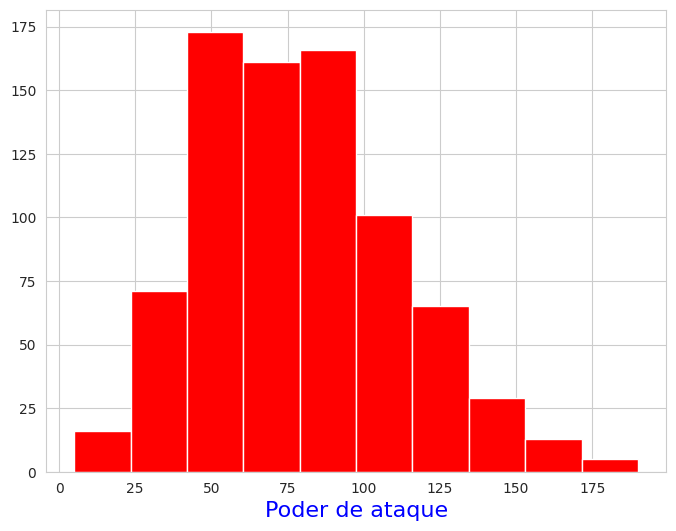

In [49]:
text_dict = {'size':16,'color':'blue'};
plt.figure(figsize=(8,6));
plt.hist(data = df_pokemon, x = 'Attack',color='red');
plt.xlabel('Poder de ataque',fontdict=text_dict);

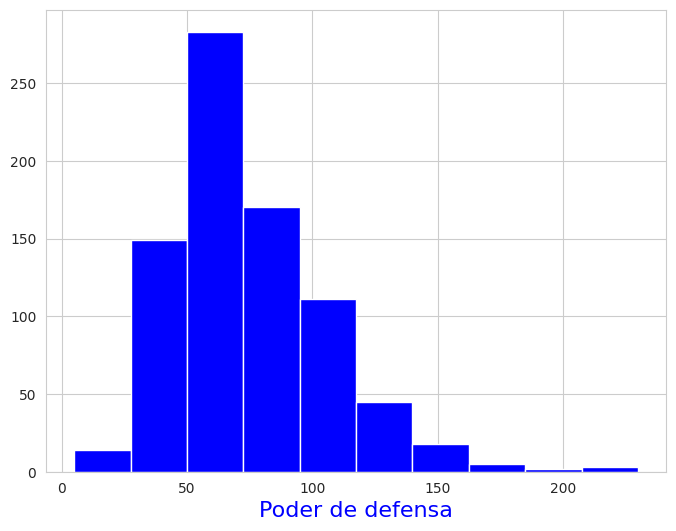

In [50]:
text_dict = {'size':16,'color':'blue'};
plt.figure(figsize=(8,6));
plt.hist(data = df_pokemon, x = 'Defense',color='blue');
plt.xlabel('Poder de defensa',fontdict=text_dict);

**Ambas**

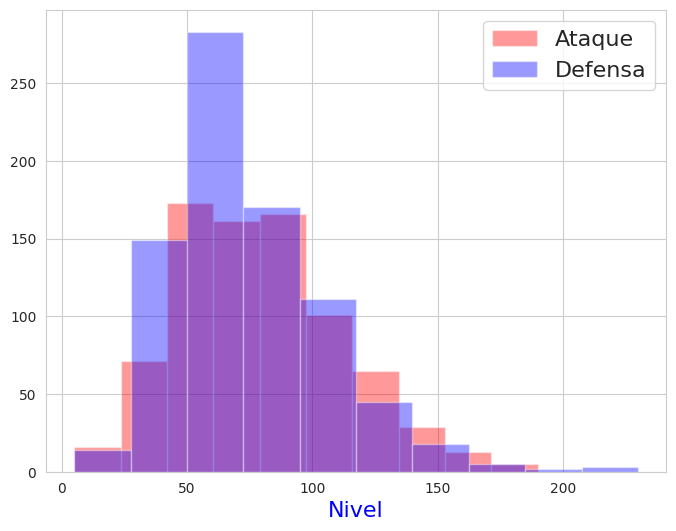

In [51]:
sns.set_style('whitegrid');

text_dict = {'size':16,'color':'blue'};
text_legend = {'size':16}
plt.figure(figsize=(8,6));
plt.hist(data = df_pokemon, x = 'Attack', alpha=0.4, color='red', label = 'Ataque');
plt.hist(data = df_pokemon, x = 'Defense', alpha=0.4, color='blue', label = 'Defensa');
plt.xlabel('Nivel',fontdict=text_dict);
plt.legend(loc='best',prop=text_legend);

### Con bins

In [52]:
# Identificamos la frecuencia de los valores únicos
tam_bins = df_pokemon['Attack'].value_counts()
tam_bins

,count
Attack,
100,40
65,39
50,37
80,37
85,33
...,...
46,1
190,1
106,1


In [53]:
# Tamaño de la cantidad de datos unicos que hay
tam_bins = len(tam_bins)
tam_bins

111

In [54]:
# Otra forma de escribirlo
tam_bins = len(df_pokemon['Attack'].value_counts())
tam_bins

111

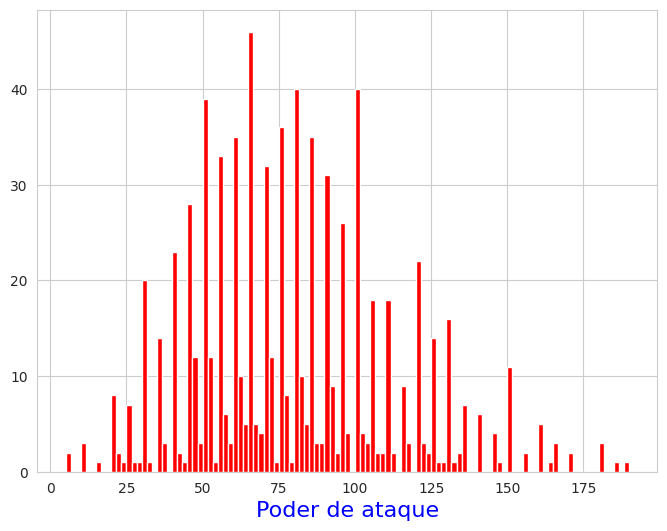

In [55]:
text_dict = {'size':16,'color':'blue'};
plt.figure(figsize=(8,6));
plt.hist(data = df_pokemon, x = 'Attack',color='red', bins = tam_bins);
plt.xlabel('Poder de ataque',fontdict=text_dict);

Con bins = 50

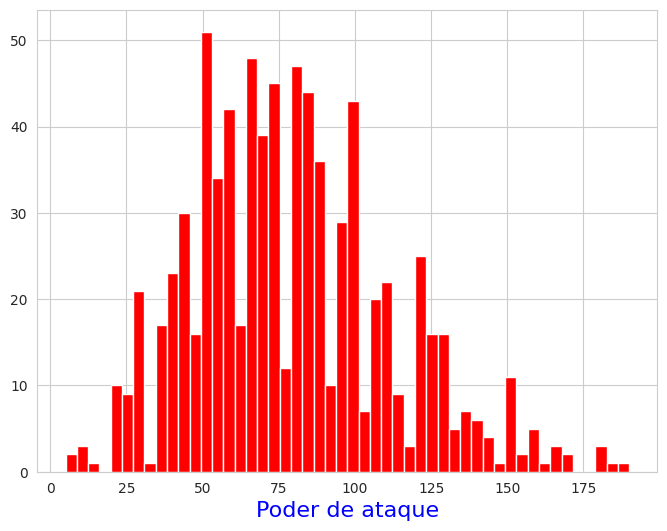

In [56]:
text_dict = {'size':16,'color':'blue'};
plt.figure(figsize=(8,6));
plt.hist(data = df_pokemon, x = 'Attack',color='red', bins = 50);
plt.xlabel('Poder de ataque',fontdict=text_dict);

**Para Defense**

In [57]:
# Otra forma de escribirlo
tam_bins = len(df_pokemon['Defense'].value_counts())
tam_bins

103

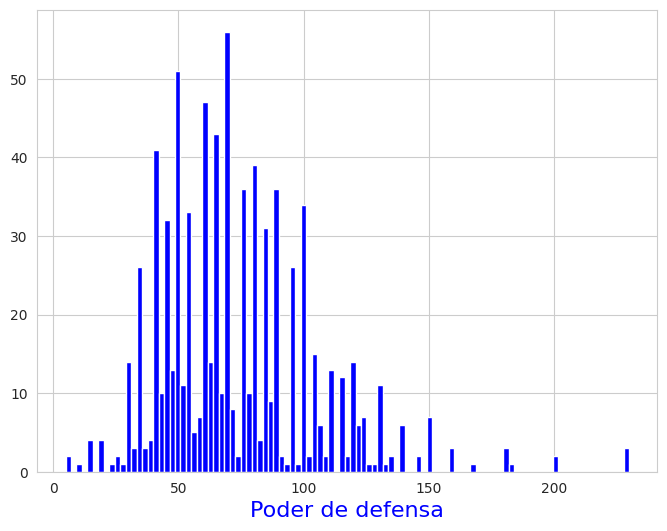

In [58]:
text_dict = {'size':16,'color':'blue'};
plt.figure(figsize=(8,6));
plt.hist(data = df_pokemon, x = 'Defense',color='blue', bins = 103);
plt.xlabel('Poder de defensa',fontdict=text_dict);

Con bins = 5

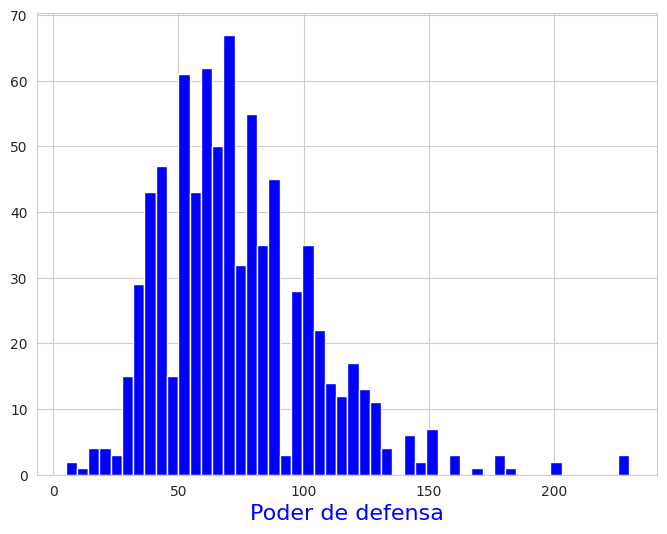

In [59]:
text_dict = {'size':16,'color':'blue'};
plt.figure(figsize=(8,6));
plt.hist(data = df_pokemon, x = 'Defense',color='blue', bins = 50);
plt.xlabel('Poder de defensa',fontdict=text_dict);

**Ambas**

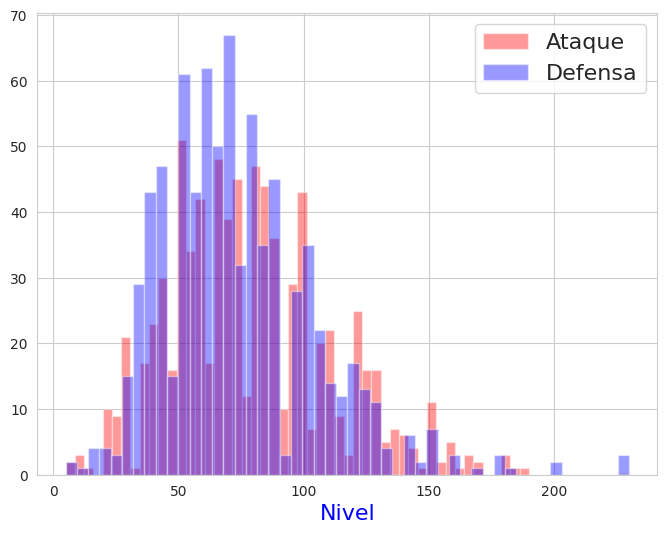

In [60]:
sns.set_style('whitegrid');

text_dict = {'size':16,'color':'blue'};
text_legend = {'size':16}
plt.figure(figsize=(8,6));
plt.hist(data = df_pokemon, x = 'Attack', alpha=0.4, color='red', label = 'Ataque', bins = 50);
plt.hist(data = df_pokemon, x = 'Defense', alpha=0.4, color='blue', label = 'Defensa', bins = 50);
plt.xlabel('Nivel',fontdict=text_dict);
plt.legend(loc='best',prop=text_legend);

## Conclusiones

Teniendo en cuenta el gráfico sin bins, ya que trabajamos datos continuos, sin embargo, gráficos con bins, permiten mejor aclaración de la frecuencia en los rangos.

Ambas gráficas presentan sesgo a la derecha.

En cuanto al **ataque**, la mayoría de datos se concentran entre 50 y 100, es decir, la mayoría de pokémones presentan una cantidad de poder de ataque entre ese rango, mientras que de 0 a 25 y 150 a en adelante, son muy pocos.

Mientras que para **defensa**, la mayoría de datos se concentran entre 50 y 70, sin embargo, el resto de valores tiene una presencia alta entre 150 y 175 de frecuencia en los rangos 50 a 25 y 70 a 100, respectivamente

Por último, al superponer las gráficas, es notable que defensa prima sobre ataque, es decir, que en una pelea Pokémon, será difícil vencer al enemigo, ya que probablemente ambos tengan una defensa alta con respecto al ataque; si para un Pokémon su poder de ataque se encuentra en el rango 125 - 150, y su enemigo tiene su defensa en ese mismo rango, lo más probable, es que el enemigo pierda.

# Dispersión

## `sns.scatterplot()`

**Objetivo:** Se utiliza para visualizar la relación entre dos variables numéricas. Cada punto en el gráfico representa una observación o dato y su posición en el espacio está determinada por los valores de las dos variables. El objetivo es identificar patrones, tendencias y correlaciones

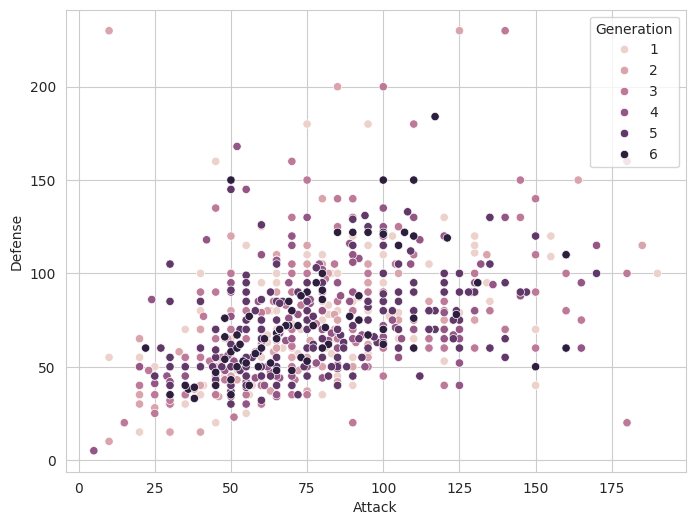

In [61]:
plt.figure(figsize=(8,6));
sns.scatterplot(data=df_pokemon,x='Attack',y='Defense',hue='Generation');

Se observa que la mayoría de pokémones están entre 25 y 100 con respecto a Ataque y para defensa aproximadamente entre 25 y 100, en especial las generaciones 6, 5 y 4, en ese orden de mayor a menor concentración.

Se destaca que para las generaciones 1, 2 y 3, se encuentran bastante dispersos, es decir, no hay una tendencia para determinar su poder de ataque y defensa con respecto a su generación

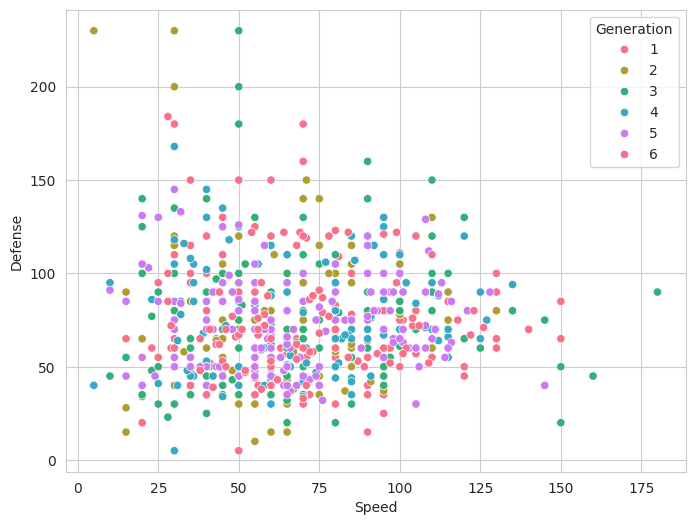

In [62]:
p_color= sns.color_palette("husl", as_cmap=True)  # Paleta de colores 'husl' personalizada
plt.figure(figsize=(8,6));
sns.scatterplot(data=df_pokemon,x='Speed',y='Defense',hue='Generation', palette=p_color);

**Speed (Velocidad):** determina qué pokemon ataca primero en cada ronda.

En cuanto a defensa, hay una mayor concentración entre 45 y 100, mientras que con respecto a Velocidad, esta entre 25 y 115, con las generaciones 6, 5, 4 y 1 primando, y dado que ese orden es de mayor a menor, se puede decir que los generación 6 no tienden a empezar una pelea cuando si su defensa se encuentra dentro de ese rango.

También, se denotan algunos **valores atípicos**, en especial de la generación 1, que indican que habrá momentos donde tienen una defensa alta, pero no atacan primero, y lo contrario pasa con la generación 3, quienes atacan primero, pero su defensa es baja

## `sns.jointplot()`

**Objetivo**: Un jointplot en seaborn combina un gráfico de dispersión con histogramas para proporcionar una visualización completa de la relación entre dos variables numéricas y sus distribuciones tanto individuales, como conjuntas.

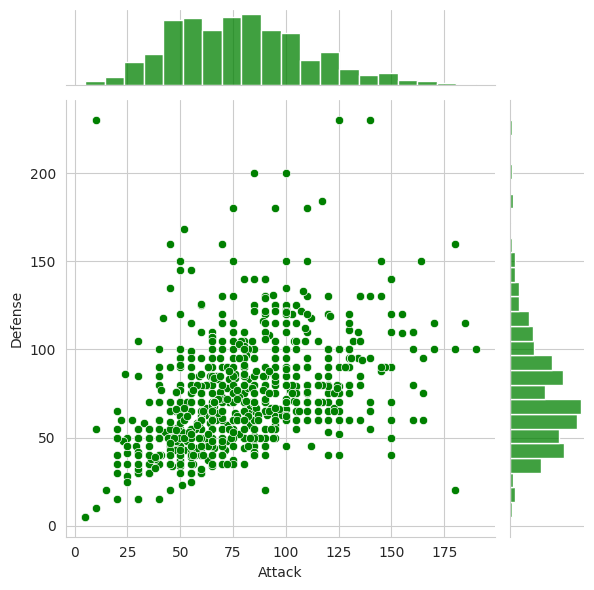

In [63]:
sns.jointplot(data=df_pokemon, x='Attack',y='Defense',color='g');

Es posible observar su rango de mayor concentración, pero en especial su correlación, es decir, a medida que la defensa aumenta, el ataque también, tal vez no en una proporción muy exacta dado su distribución de datos, y que se destaca como la defensa crece más rápido con respecto al ataque. Esto concuerda con lo dicho anteriormente, y es que los pokémones del estudio, tienen una mayor defensa, que poder de ataque.



---
`kind = 'hex'`

**Objetivo:** Utiliza hexágonos para representar la densidad de puntos en un lugar en el gráfico de dispersión. El objetivo es proporcionar la identificación de patrones de agrupación en los datos.


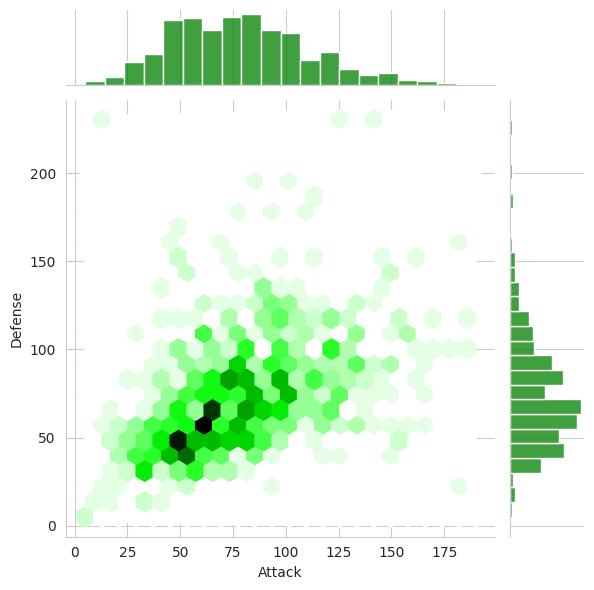

In [64]:
sns.jointplot(data=df_pokemon, x='Attack',y='Defense',color='g', kind = 'hex');

Donde hay mayores hexágonos de color oscuro es entre los rangos 50 - 75 para ataque y defensa, siendo esta zona donde mayor hay concentración de los pokémones, es decir, es probable que un Pokémon dentro de ese rango de defensa, también tenga una cantidad de poder de ataque entre 50 y 75.

# Subconjuntos

In [65]:
df_p_water = df_pokemon[df_pokemon['Type 1']=='Water'];
df_p_water.head()

,Name,Type 1,Type 2,Total,Attack,Defense,Speed,Generation
9,Squirtle,Water,NaN,314,48,65,43,1
10,Wartortle,Water,NaN,405,63,80,58,1
11,Blastoise,Water,NaN,530,83,100,78,1
12,BlastoiseMega Blastoise,Water,NaN,630,103,120,78,1
59,Psyduck,Water,NaN,320,52,48,55,1


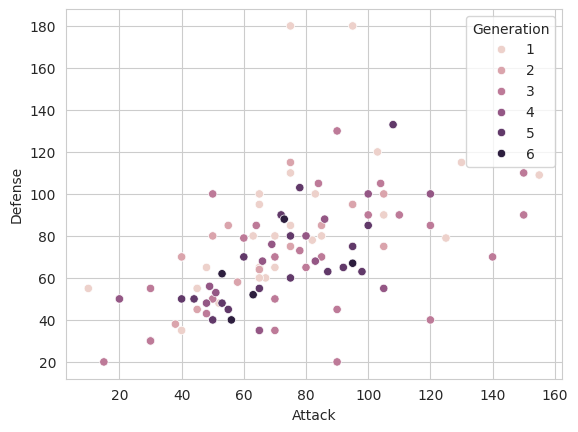

In [66]:
sns.scatterplot(data=df_p_water,x='Attack',y='Defense',hue='Generation');

Se puede observar sobre todo las 3 primeras generaciones cuando se trata de tipo agua, además, es fácil notar que la dispersión de datos es un poco alta para estos, esto se puede deber a que son pocos datos. Por otro lado, gran parte se concentra entre el rango 40 - 90 para ataque y 40 - 80 de defensa, independientemente de que generación sean.



---
`kind='kde'`

**Objetivo:** Ayuda a identificar áreas de concentración de datos y a comprender la relación entre las variables de una manera más continua y suavizada que un gráfico de dispersión.

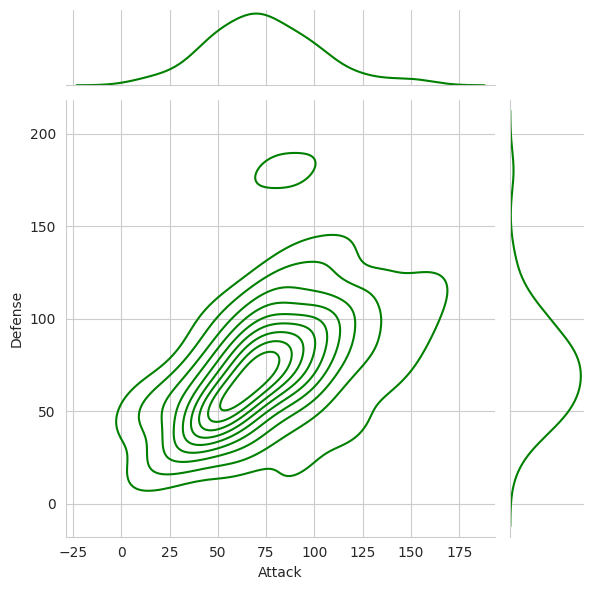

In [67]:
sns.jointplot(data=df_p_water,x='Attack',y='Defense',color='g',kind='kde');

Gracias a este gráfico se confirma que el área de mayor concentración es de 50 - 80 para ataque y defensa, además que se ve una relación de crecimiento entre defensa y ataque, a medida que la primera aumenta, la segunda también

## `sns.pairplot()`

**Matriz de Gráficos de Dispersión:**

- **Diagonal principal**: Se muestran histogramas de las variables seleccionadas. Cada histograma representa la distribución individual de cada variable.

- **Gráficos de Dispersión:** Fuera de la diagonal principal, se muestran gráficos de dispersión para cada par de variables.



---



**Objetivos:**

1. Permite visualizar las relaciones entre todas las combinaciones posibles de las variables para identificar patrones y correlaciones.

2. Permite identificar posibles valores atípicos en los gráficos de dispersión.

3. El uso del color para representar la variable en `hue` permite comparar visualmente cómo las relaciones entre las variables pueden variar.


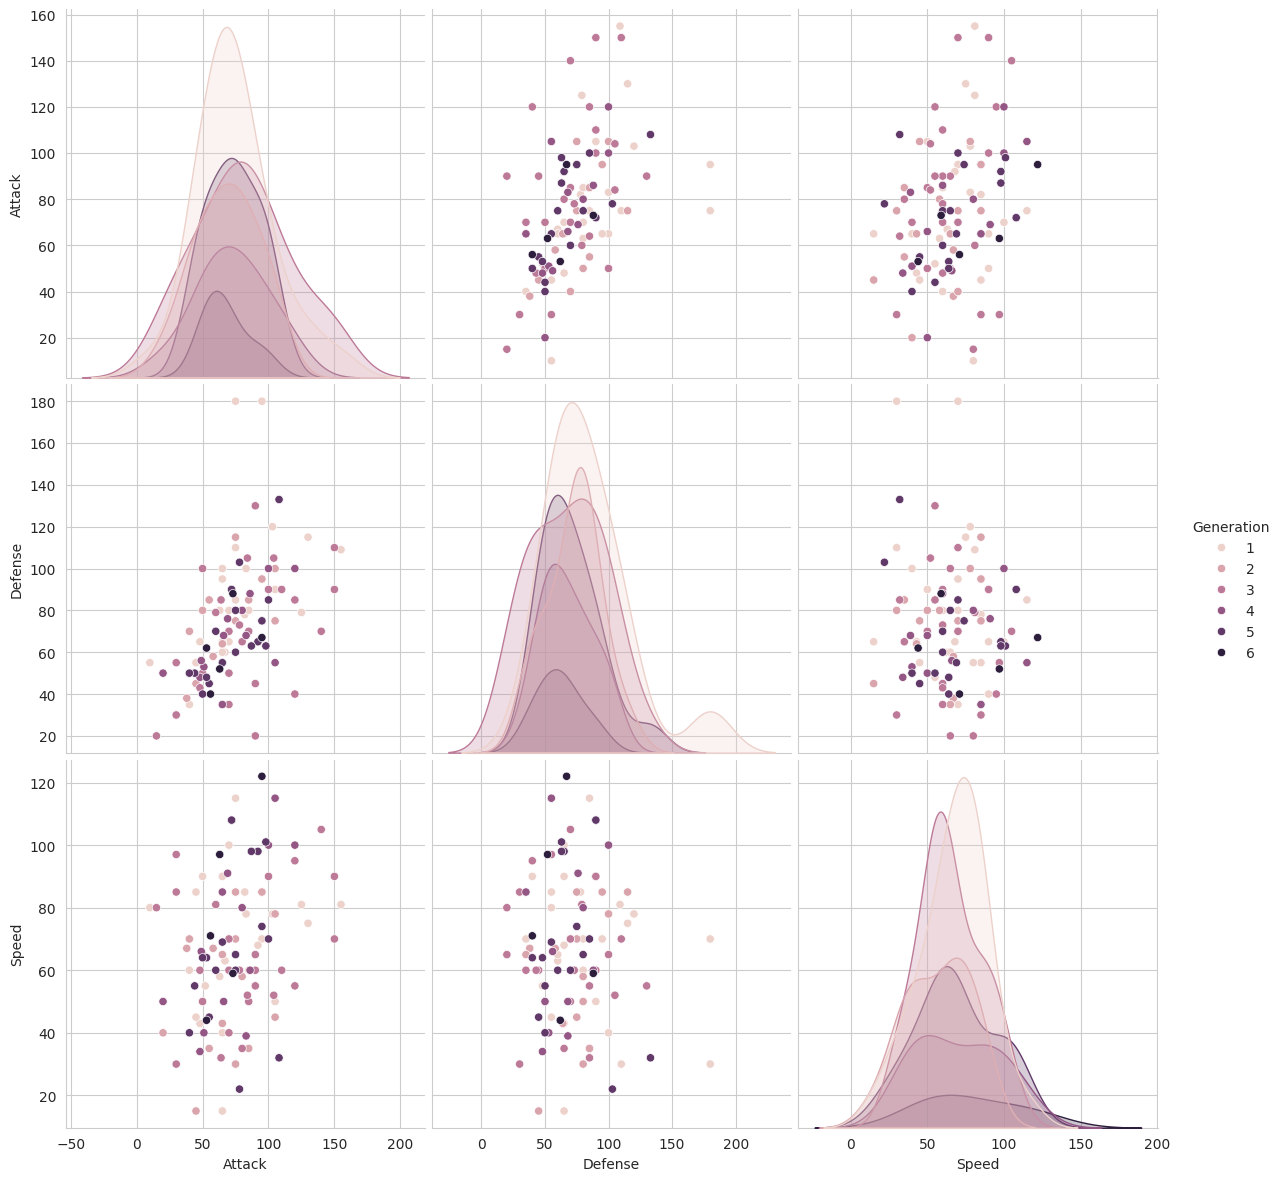

In [68]:
colu = ['Attack','Defense','Speed'];
sns.pairplot(data=df_p_water, x_vars=colu, y_vars=colu, hue='Generation',height=4);

**Diagonal principal:** Para ataque, la generación con mayor nivel, es la 1, con bastante diferencia con respecto a las demás.
Para defensa, la generación 1 también destaca, pero por muy poco, las generaciones 2, 3 y 5, mantienen una defensa considerablemente alta.
Con respecto a velocidad, la generación 1 es quien primero suele atacar, seguido de la 3ra generación


## `sns.boxplot()`

**Objetivo:** Visualizar la distribución de la variable numérica en diferentes categorias. Al especificar `showfliers=False`, estás optando por no mostrar los valores atípicos en el gráfico, lo que permite enfocarse en la distribución principal de los datos.

**Interpretación:**

- **Eje x:** Se muestran las categorías o grupos de datos.

- **Eje y:** Es la que estás analizando. La altura de la caja y la posición de la línea en el interior de la caja indican estadísticas resumidas de la distribución de la variable con respecto a la categoría.

- **Cajas (Boxplots):** La parte inferior de la caja (Q1) corresponde al primer cuartil (25% de los datos), la línea en el medio de la caja es la mediana (50% de los datos), y la parte superior de la caja (Q3) corresponde al tercer cuartil (75% de los datos).

- **Bigotes (Whiskers):** Los bigotes se extienden desde la caja y muestran la extensión de los datos dentro el rango intercuartílico. Los valores que están más allá de los bigotes se considerarían valores atípicos.


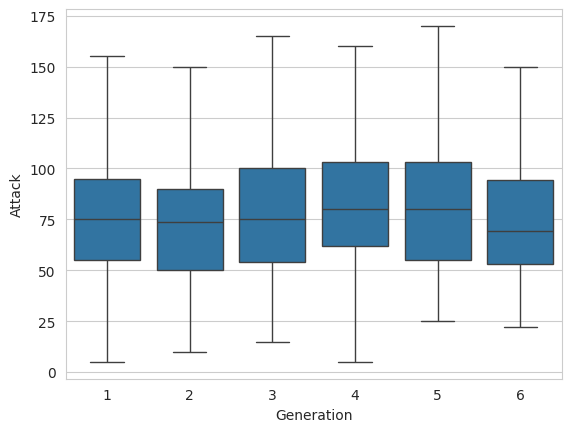

In [69]:
sns.boxplot(data=df_pokemon,x='Generation',y='Attack', showfliers=False);

Como se comprobó arriba, el rango de los datos es bastante amplio, y su punto de mayor concentración está entre 50 y 100, además su media de datos está alrededor de 70 y 80, por ello podemos decir que no hay una gran variación entre el ataque a medida que aumenta la generación, ya que fluctúa por poco, pero no significa que un Pokémon de mayor generación vaya a ser más poderoso que uno de 1ra

# Agrupaciones

In [70]:
# Gráficas estadisticas

select = ['Generation', 'Attack']    # Selección de columnas a trabajar
groups = ['Generation']     #Selección de columnas que agrupará la información

# Creación de nuevo dataframe y le aplicamos la función mean (promedio)
df_p_water_gen_mean = df_p_water[select].groupby(by = groups).mean()
df_p_water_gen_mean

,Attack
Generation,
1,74.193548
2,68.111111
3,80.666667
4,72.461538
5,73.277778
6,68.000000


In [71]:
# Creación de nuevo dataframe y le aplicamos la función count
# para saber la cantidad de valores únicos por generacion
df_p_water_gen_count = df_p_water[select].groupby(by = groups).count()
df_p_water_gen_count

,Attack
Generation,
1,31
2,18
3,27
4,13
5,18
6,5
